<a href="https://colab.research.google.com/github/ybii22/Machine-Learning/blob/main/week%208%20-%2016/Chapter_11_%E2%80%93_Training_Deep_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from pathlib import Path

IMAGES_PATH = Path() / "images" / "deep"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Vanishing/Exploding Gradients Problem

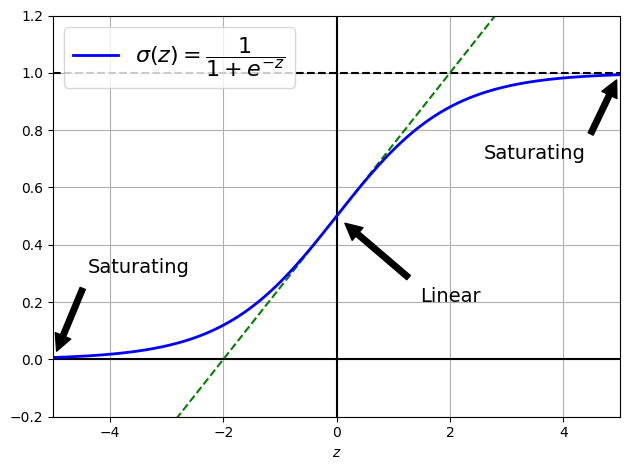

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

z = np.linspace(-5, 5, 200)

plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [1, 1], 'k--')
plt.plot([0, 0], [-0.2, 1.2], 'k-')
plt.plot([-5, 5], [-3/4, 7/4], 'g--')
plt.plot(z, sigmoid(z), "b-", linewidth=2,
         label=r"$\sigma(z) = \dfrac{1}{1+e^{-z}}$")
props = dict(facecolor='black', shrink=0.1)
plt.annotate('Saturating', xytext=(3.5, 0.7), xy=(5, 1), arrowprops=props,
             fontsize=14, ha="center")
plt.annotate('Saturating', xytext=(-3.5, 0.3), xy=(-5, 0), arrowprops=props,
             fontsize=14, ha="center")
plt.annotate('Linear', xytext=(2, 0.2), xy=(0, 0.5), arrowprops=props,
             fontsize=14, ha="center")
plt.grid(True)
plt.axis([-5, 5, -0.2, 1.2])
plt.xlabel("$z$")
plt.legend(loc="upper left", fontsize=16)

save_fig("sigmoid_saturation_plot")
plt.show()

## Glorot and He Initialization

In [ ]:
import numpy as np
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_diabetes

# 1. Load data (contoh: dataset diabetes)
dataset = load_diabetes()
X = dataset.data
y = dataset.target

# 2. Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Ambil input dimension (jumlah fitur)
input_dim = X_train.shape[1]  # biasanya 10 untuk dataset diabetes

# 4. Buat model
model = keras.models.Sequential([
    keras.layers.Input(shape=(input_dim,)),
    keras.layers.Dense(64, activation="relu", kernel_initializer="he_normal"),
    keras.layers.Dense(64, activation="relu", kernel_initializer="he_normal"),
    keras.layers.Dense(1)  # output regresi
])

# 5. Kompilasi model
model.compile(optimizer="adam", loss="mse", metrics=["mae"])

# 6. Training
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.1)

# 7. Evaluasi
mse, mae = model.evaluate(X_test, y_test)
print("Test MSE:", mse)
print("Test MAE:", mae)

# 8. Prediksi
y_pred = model.predict(X_test[:5])
print("Prediksi:", y_pred.flatten())


Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 29256.7930 - mae: 151.5732 - val_loss: 27375.3867 - val_mae: 147.1558
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 30774.8848 - mae: 157.6720 - val_loss: 27153.3828 - val_mae: 146.4215
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 28753.2461 - mae: 151.0474 - val_loss: 26724.7480 - val_mae: 144.9963
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 30228.3164 - mae: 154.6574 - val_loss: 25912.0703 - val_mae: 142.2712
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 27436.0059 - mae: 145.4375 - val_loss: 24514.5742 - val_mae: 137.4706
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 24339.9316 - mae: 136.7392 - val_loss: 22350.3398 - val_mae: 129.7049
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 24167.7793 - mae: 135.0662 - val_loss: 19394.6289 - val_mae: 118.3051
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 19440.8926 - mae: 118.9594 - val_loss: 15832.

In [ ]:
he_avg_init = keras.initializers.VarianceScaling(scale=2., mode='fan_avg',
                                                  distribution='uniform')
keras.layers.Dense(10, activation="sigmoid", kernel_initializer=he_avg_init)

<Dense name=dense_3, built=False>

## Nonsaturating Activation Functions

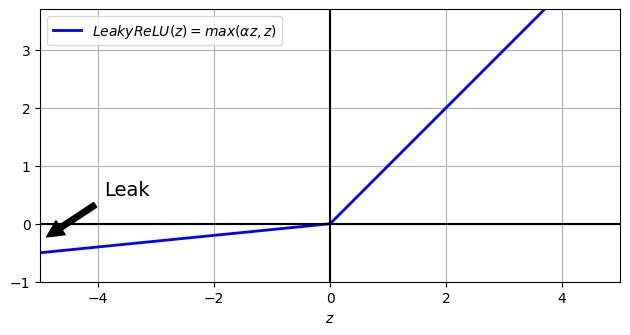

In [ ]:
def leaky_relu(z, alpha):
    return np.maximum(alpha * z, z)

z = np.linspace(-5, 5, 200)
plt.plot(z, leaky_relu(z, 0.1), "b-", linewidth=2, label=r"$LeakyReLU(z) = max(\alpha z, z)$")
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([0, 0], [-1, 3.7], 'k-')
plt.grid(True)
props = dict(facecolor='black', shrink=0.1)
plt.annotate('Leak', xytext=(-3.5, 0.5), xy=(-5, -0.3), arrowprops=props,
             fontsize=14, ha="center")
plt.xlabel("$z$")
plt.axis([-5, 5, -1, 3.7])
plt.gca().set_aspect("equal")
plt.legend()

save_fig("leaky_relu_plot")
plt.show()

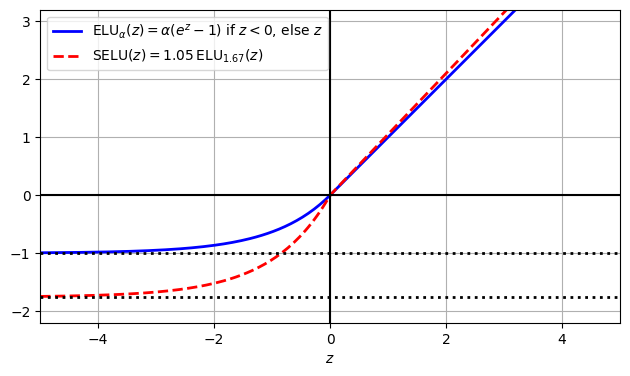

In [ ]:
from scipy.special import erfc

# alpha and scale to self normalize with mean 0 and standard deviation 1
# (see equation 14 in the paper):
alpha_0_1 = -np.sqrt(2 / np.pi) / (erfc(1 / np.sqrt(2)) * np.exp(1 / 2) - 1)
scale_0_1 = (
    (1 - erfc(1 / np.sqrt(2)) * np.sqrt(np.e))
    * np.sqrt(2 * np.pi)
    * (
        2 * erfc(np.sqrt(2)) * np.e ** 2
        + np.pi * erfc(1 / np.sqrt(2)) ** 2 * np.e
        - 2 * (2 + np.pi) * erfc(1 / np.sqrt(2)) * np.sqrt(np.e)
        + np.pi
        + 2
    ) ** (-1 / 2)
)

def elu(z, alpha=1):
    return np.where(z < 0, alpha * (np.exp(z) - 1), z)

def selu(z, scale=scale_0_1, alpha=alpha_0_1):
    return scale * elu(z, alpha)

z = np.linspace(-5, 5, 200)
plt.plot(z, elu(z), "b-", linewidth=2, label=r"ELU$_\alpha(z) = \alpha (e^z - 1)$ if $z < 0$, else $z$")
plt.plot(z, selu(z), "r--", linewidth=2, label=r"SELU$(z) = 1.05 \, $ELU$_{1.67}(z)$")
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [-1, -1], 'k:', linewidth=2)
plt.plot([-5, 5], [-1.758, -1.758], 'k:', linewidth=2)
plt.plot([0, 0], [-2.2, 3.2], 'k-')
plt.grid(True)
plt.axis([-5, 5, -2.2, 3.2])
plt.xlabel("$z$")
plt.gca().set_aspect("equal")
plt.legend()

save_fig("elu_selu_plot")
plt.show()

In [ ]:
from tensorflow import keras

model = keras.models.Sequential([
    keras.layers.Input(shape=(10,)),  # Ganti 10 dengan jumlah fitur Anda
    keras.layers.Dense(64, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(alpha=0.2),
    keras.layers.Dense(64, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(alpha=0.2),
    keras.layers.Dense(10, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(alpha=0.2),
    keras.layers.Dense(1)  # Output layer, misal untuk regresi
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [ ]:
layer = keras.layers.Dense(10, activation="selu",
kernel_initializer="lecun_normal")

# Batch Normalization

## Implementing Batch Normalization with Keras

In [ ]:
model = keras.models.Sequential([
keras.layers.Flatten(input_shape=[28, 28]),
keras.layers.BatchNormalization(),
keras.layers.Dense(300, activation="elu", kernel_initializer="he_normal"),
keras.layers.BatchNormalization(),
keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"),
keras.layers.BatchNormalization(),
keras.layers.Dense(10, activation="softmax")
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 784)            │         3,136 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 300)            │         1,200 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 271,346 (1.04 MB)

 Trainable params: 268,978 (1.03 MB)

 Non-trainable params: 2,368 (9.25 KB)

In [ ]:
[(var.name, var.trainable) for var in model.layers[1].variables]

[('gamma', True),
 ('beta', True),
 ('moving_mean', False),
 ('moving_variance', False)]

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

# Contoh model sederhana dengan BatchNormalization
model = keras.models.Sequential([
    layers.Input(shape=(10,)),
    layers.BatchNormalization(),
    layers.Dense(1)
])

# Akses layer BatchNormalization
bn_layer = model.layers[1]

# Cek apakah layer bisa dilatih
print("Trainable:", bn_layer.trainable)

# Cek moving statistics (berfungsi setelah model di-fit atau di-call)
# Harus melewati data untuk menginisialisasi moving stats
import numpy as np
X_dummy = np.random.rand(5, 10)
model(X_dummy, training=True)  # call model untuk inisialisasi

# Tampilkan moving mean dan variance
print("Moving mean:", bn_layer.moving_mean.numpy())
print("Moving variance:", bn_layer.moving_variance.numpy())


Trainable: True


AttributeError: 'Dense' object has no attribute 'moving_mean'

In [ ]:
model = keras.models.Sequential([
keras.layers.Flatten(input_shape=[28, 28]),
keras.layers.BatchNormalization(),
keras.layers.Dense(300, kernel_initializer="he_normal", use_bias=False),
keras.layers.BatchNormalization(),
keras.layers.Activation("elu"),
keras.layers.Dense(100, kernel_initializer="he_normal", use_bias=False),
keras.layers.BatchNormalization(),
keras.layers.Activation("elu"),
keras.layers.Dense(10, activation="softmax")
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
class BatchNormalization(keras.layers.Layer):
    [...]
    def call(self, inputs, training=None):
        [...]

# Gradient Clipping

In [ ]:
optimizer = keras.optimizers.SGD(clipvalue=1.0)
model.compile(loss="mse", optimizer=optimizer)

# Transfer Learning with Keras

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

# Buat model_A sederhana
model_A = keras.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile model
model_A.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

# Load data MNIST
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Normalisasi data
x_train, x_test = x_train / 255.0, x_test / 255.0

# Train model
model_A.fit(x_train, y_train, epochs=1, batch_size=32)

# Simpan model ke file .h5
model_A.save("my_model_A.h5")


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8580 - loss: 0.4997


In [ ]:
# Load model A
model_A = keras.models.load_model("my_model_A.h5")

# Buat model B dengan semua layer dari model_A kecuali layer terakhir
model_B_on_A = keras.models.Sequential()

for layer in model_A.layers[:-1]:
    model_B_on_A.add(layer)

# Tambahkan layer output baru
model_B_on_A.add(keras.layers.Dense(1, activation="sigmoid"))


In [ ]:
model_A_clone = keras.models.clone_model(model_A)
model_A_clone.set_weights(model_A.get_weights())

In [ ]:
for layer in model_B_on_A.layers[:-1]:
    layer.trainable = False
model_B_on_A.compile(loss="binary_crossentropy", optimizer="sgd",
                    metrics=["accuracy"])

In [ ]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from tensorflow import keras
import numpy as np

# Buat dataset binary classification
X, y = make_moons(n_samples=1000, noise=0.2, random_state=42)

# Split ke training dan validation
X_train_B, X_valid_B, y_train_B, y_valid_B = train_test_split(X, y, test_size=0.2, random_state=42)

# Buat ulang model_A agar cocok input-nya (2 fitur)
model_A = keras.Sequential([
    keras.layers.Dense(16, activation="relu", input_shape=(2,)),
    keras.layers.Dense(8, activation="relu"),
    keras.layers.Dense(1, activation="sigmoid")  # binary classification
])

# Simpan sebagai .h5 agar bisa di-load ulang
model_A.save("my_model_A.h5")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Load model_A
model_A = keras.models.load_model("my_model_A.h5")

# Buat model_B_on_A dari model_A tanpa layer terakhir
model_B_on_A = keras.Sequential(model_A.layers[:-1])
model_B_on_A.add(keras.layers.Dense(1, activation="sigmoid"))

# Freeze semua layer kecuali yang terakhir (awal)
for layer in model_B_on_A.layers[:-1]:
    layer.trainable = False

# Compile dan training awal
model_B_on_A.compile(loss="binary_crossentropy", optimizer="sgd", metrics=["accuracy"])
history = model_B_on_A.fit(X_train_B, y_train_B, epochs=4,
                           validation_data=(X_valid_B, y_valid_B))

# Fine-tuning: unfreeze semua layer
for layer in model_B_on_A.layers[:-1]:
    layer.trainable = True

# Compile ulang dengan learning rate lebih kecil
optimizer = keras.optimizers.SGD(learning_rate=1e-4)
model_B_on_A.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])

# Fine-tune training
history = model_B_on_A.fit(X_train_B, y_train_B, epochs=16,
                           validation_data=(X_valid_B, y_valid_B))


Epoch 1/4
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.2143 - loss: 0.7348 - val_accuracy: 0.2550 - val_loss: 0.7301
Epoch 2/4
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2367 - loss: 0.7302 - val_accuracy: 0.2600 - val_loss: 0.7269
Epoch 3/4
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2645 - loss: 0.7271 - val_accuracy: 0.2850 - val_loss: 0.7238
Epoch 4/4
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3204 - loss: 0.7238 - val_accuracy: 0.3250 - val_loss: 0.7208
Epoch 1/16
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.3541 - loss: 0.7189 - val_accuracy: 0.3250 - val_loss: 0.7206
Epoch 2/16
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3218 - loss: 0.7197 - val_accuracy: 0.3300 - val_loss: 0.7204
Epoch 3/16
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.3431 - loss: 0.7227 - val_accuracy: 0.3350 - val_loss: 0.7202
Epoch 4/16
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3543 - loss: 0.7183 - val_accuracy: 0.3350 - val_loss: 

In [ ]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

# Buat dataset
X, y = make_moons(n_samples=1000, noise=0.2, random_state=42)

# Pertama: train+temp, lalu valid+test
X_train_B, X_temp, y_train_B, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)  # 60% train
X_valid_B, X_test_B, y_valid_B, y_test_B = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)  # 20% valid, 20% test


In [ ]:
model_B_on_A.evaluate(X_test_B, y_test_B)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3896 - loss: 0.7136 


[0.7163401246070862, 0.375]

In [ ]:
def build_and_train_model(optimizer):
    model = keras.models.Sequential([
        keras.layers.Dense(16, activation="relu", input_shape=(2,)),
        keras.layers.Dense(8, activation="relu"),
        keras.layers.Dense(1, activation="sigmoid")
    ])
    model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])
    history = model.fit(X_train_B, y_train_B, epochs=10,  # atau berapa pun
                        validation_data=(X_valid_B, y_valid_B),
                        verbose=1)
    return history


# Momentum Optimization

In [ ]:
optimizer = keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)

# Nesterov Accelerated Gradient

In [ ]:
optimizer =keras.optimizers.SGD(learning_rate=0.001, momentum=0.9,
                                    nesterov=True)

In [ ]:
history_nesterov = build_and_train_model(optimizer)

Epoch 1/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.5333 - loss: 0.6493 - val_accuracy: 0.7850 - val_loss: 0.6136
Epoch 2/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7894 - loss: 0.6086 - val_accuracy: 0.8200 - val_loss: 0.5829
Epoch 3/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8424 - loss: 0.5789 - val_accuracy: 0.8400 - val_loss: 0.5539
Epoch 4/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8384 - loss: 0.5514 - val_accuracy: 0.8500 - val_loss: 0.5260
Epoch 5/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8666 - loss: 0.5170 - val_accuracy: 0.8600 - val_loss: 0.5012
Epoch 6/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8663 - loss: 0.4856 - val_accuracy: 0.8650 - val_loss: 0.4792
Epoch 7/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8560 - loss: 0.4738 - val_accuracy: 0.8650 - val_loss: 0.4573
Epoch 8/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8617 - loss: 0.4450 - val_accuracy: 0.8650 - val_loss

# AdaGrad

In [ ]:
optimizer = keras.optimizers.Adagrad(learning_rate=0.001)

In [ ]:
history_adagrad = build_and_train_model(optimizer)

Epoch 1/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.5181 - loss: 0.7061 - val_accuracy: 0.5450 - val_loss: 0.6933
Epoch 2/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5451 - loss: 0.6985 - val_accuracy: 0.5500 - val_loss: 0.6886
Epoch 3/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5310 - loss: 0.6987 - val_accuracy: 0.5600 - val_loss: 0.6848
Epoch 4/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5430 - loss: 0.6935 - val_accuracy: 0.5800 - val_loss: 0.6816
Epoch 5/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5754 - loss: 0.6851 - val_accuracy: 0.5850 - val_loss: 0.6787
Epoch 6/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5707 - loss: 0.6895 - val_accuracy: 0.6000 - val_loss: 0.6761
Epoch 7/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6012 - loss: 0.6812 - val_accuracy: 0.6350 - val_loss: 0.6736
Epoch 8/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6078 - loss: 0.6789 - val_accuracy: 0.6600 - val_

# RMSProp

In [ ]:
optimizer =keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9)

In [ ]:
history_rmsprop = build_and_train_model(optimizer)

Epoch 1/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.5000 - loss: 0.7529 - val_accuracy: 0.5500 - val_loss: 0.7077
Epoch 2/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5385 - loss: 0.7032 - val_accuracy: 0.6000 - val_loss: 0.6816
Epoch 3/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5662 - loss: 0.6773 - val_accuracy: 0.7050 - val_loss: 0.6515
Epoch 4/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7911 - loss: 0.6400 - val_accuracy: 0.8000 - val_loss: 0.6229
Epoch 5/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8163 - loss: 0.6057 - val_accuracy: 0.7850 - val_loss: 0.5917
Epoch 6/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8033 - loss: 0.5758 - val_accuracy: 0.7850 - val_loss: 0.5602
Epoch 7/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7985 - loss: 0.5393 - val_accuracy: 0.7800 - val_loss: 0.5307
Epoch 8/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8068 - loss: 0.5012 - val_accuracy: 0.7850 - val_loss

# Adam and Nadam Optimization

In [ ]:
optimizer = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

In [ ]:
history_adam = build_and_train_model(optimizer)

Epoch 1/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.2137 - loss: 0.8930 - val_accuracy: 0.2850 - val_loss: 0.8081
Epoch 2/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2651 - loss: 0.8209 - val_accuracy: 0.3350 - val_loss: 0.7577
Epoch 3/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3388 - loss: 0.7639 - val_accuracy: 0.4450 - val_loss: 0.7131
Epoch 4/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4529 - loss: 0.7099 - val_accuracy: 0.5450 - val_loss: 0.6707
Epoch 5/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5417 - loss: 0.6578 - val_accuracy: 0.6150 - val_loss: 0.6318
Epoch 6/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7094 - loss: 0.6170 - val_accuracy: 0.8050 - val_loss: 0.5982
Epoch 7/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7836 - loss: 0.5833 - val_accuracy: 0.8000 - val_loss: 0.5710
Epoch 8/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8497 - loss: 0.5516 - val_accuracy: 0.8100 - val_

# Learning Rate Scheduling

Training with learning rate: way too high: diverges
Training with learning rate: too high: suboptimal
Training with learning rate: just right
Training with learning rate: too small: slow
Training with learning rate: Start high, reduce it


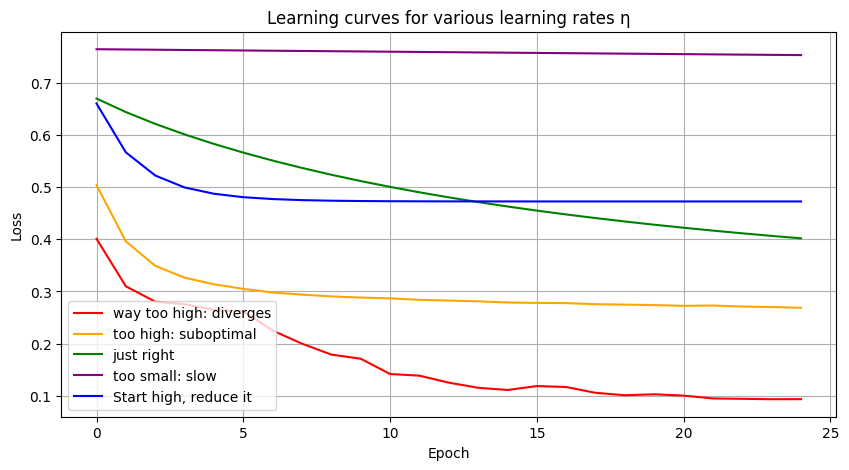

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

# 1. Dataset
X, y = make_moons(n_samples=1000, noise=0.2, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Fungsi untuk membuat model
def build_model():
    model = keras.models.Sequential([
        keras.layers.Dense(16, activation='relu', input_shape=(2,)),
        keras.layers.Dense(1, activation='sigmoid')
    ])
    return model

# 3. Simpan loss dari berbagai learning rate
histories = {}

learning_rates = {
    "way too high: diverges": 1.0,
    "too high: suboptimal": 0.1,
    "just right": 0.01,
    "too small: slow": 0.0001,
    "Start high, reduce it": keras.optimizers.schedules.ExponentialDecay(
        initial_learning_rate=0.1, decay_steps=100, decay_rate=0.1
    )
}

for label, lr in learning_rates.items():
    model = build_model()
    if isinstance(lr, keras.optimizers.schedules.LearningRateSchedule):
        opt = keras.optimizers.SGD(learning_rate=lr)
    else:
        opt = keras.optimizers.SGD(learning_rate=lr)

    model.compile(loss="binary_crossentropy", optimizer=opt, metrics=["accuracy"])
    print(f"Training with learning rate: {label}")
    history = model.fit(X_train, y_train, epochs=25, validation_data=(X_valid, y_valid),
                        verbose=0)
    histories[label] = history.history["loss"]

# 4. Plot hasil
plt.figure(figsize=(10, 5))
colors = {
    "way too high: diverges": "red",
    "too high: suboptimal": "orange",
    "just right": "green",
    "too small: slow": "purple",
    "Start high, reduce it": "blue"
}

for label, loss in histories.items():
    plt.plot(loss, label=label, color=colors[label])

plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Learning curves for various learning rates η")
plt.legend()
plt.grid(True)
plt.show()


### power scheduling

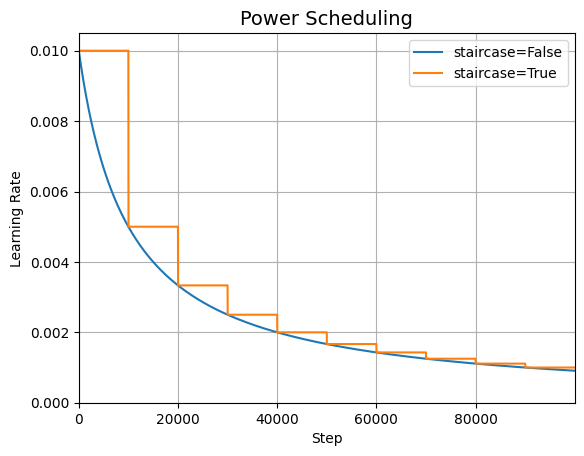

In [ ]:
initial_learning_rate = 0.01
decay_rate = 1.0
decay_steps = 10_000

steps = np.arange(100_000)
lrs = initial_learning_rate / (1 + decay_rate * steps / decay_steps)
lrs2 = initial_learning_rate / (1 + decay_rate * np.floor(steps / decay_steps))

plt.plot(steps, lrs,  "-", label="staircase=False")
plt.plot(steps, lrs2,  "-", label="staircase=True")
plt.axis([0, steps.max(), 0, 0.0105])
plt.xlabel("Step")
plt.ylabel("Learning Rate")
plt.title("Power Scheduling", fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

### Exponential scheduling

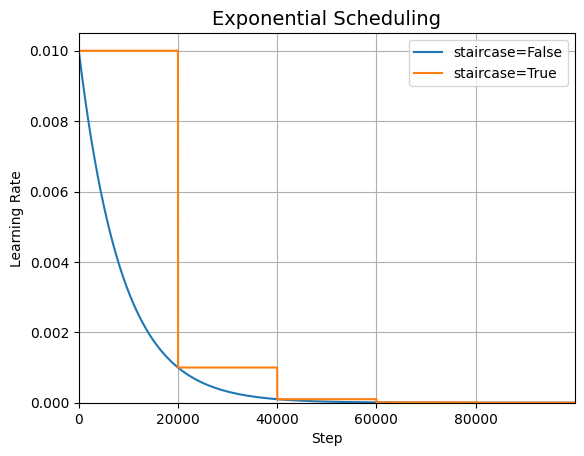

In [ ]:
initial_learning_rate = 0.01
decay_rate = 0.1
decay_steps = 20_000

steps = np.arange(100_000)
lrs = initial_learning_rate * decay_rate ** (steps / decay_steps)
lrs2 = initial_learning_rate * decay_rate ** np.floor(steps / decay_steps)

plt.plot(steps, lrs,  "-", label="staircase=False")
plt.plot(steps, lrs2,  "-", label="staircase=True")
plt.axis([0, steps.max(), 0, 0.0105])
plt.xlabel("Step")
plt.ylabel("Learning Rate")
plt.title("Exponential Scheduling", fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

### Piecewise constant scheduling

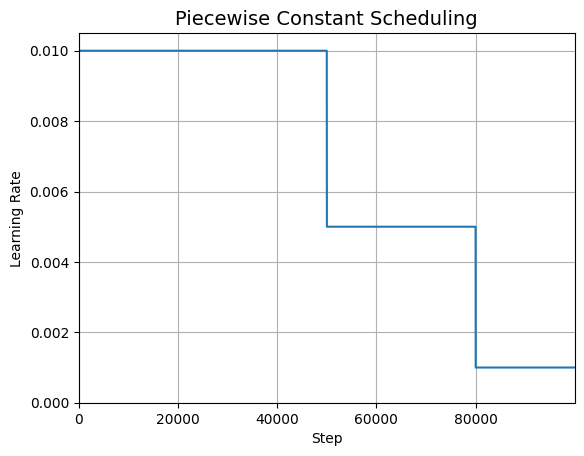

In [ ]:
boundaries = [50_000, 80_000]
values = [0.01, 0.005, 0.001]

steps = np.arange(100_000)

lrs = np.full(len(steps), values[0])
for boundary, value in zip(boundaries, values[1:]):
    lrs[boundary:] = value

plt.plot(steps, lrs, "-")
plt.axis([0, steps.max(), 0, 0.0105])
plt.xlabel("Step")
plt.ylabel("Learning Rate")
plt.title("Piecewise Constant Scheduling", fontsize=14)
plt.grid(True)
plt.show()

In [ ]:
optimizer = keras.optimizers.SGD(learning_rate=0.01, decay=1e-4)

/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


In [ ]:
history_adam = build_and_train_model(optimizer)

Epoch 1/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.8146 - loss: 0.6619 - val_accuracy: 0.8500 - val_loss: 0.6512
Epoch 2/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8658 - loss: 0.6461 - val_accuracy: 0.8500 - val_loss: 0.6383
Epoch 3/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8692 - loss: 0.6289 - val_accuracy: 0.8500 - val_loss: 0.6256
Epoch 4/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8660 - loss: 0.6151 - val_accuracy: 0.8350 - val_loss: 0.6130
Epoch 5/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8390 - loss: 0.6084 - val_accuracy: 0.8250 - val_loss: 0.6006
Epoch 6/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8300 - loss: 0.5963 - val_accuracy: 0.8150 - val_loss: 0.5882
Epoch 7/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8561 - loss: 0.5700 - val_accuracy: 0.8100 - val_loss: 0.5761
Epoch 8/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8395 - loss: 0.5671 - val_accuracy: 0.8100 - val_loss

In [ ]:
def exponential_decay_fn(epoch):
    return 0.01 * 0.1**(epoch / 20)

In [ ]:
def exponential_decay(lr0, s):
    def exponential_decay_fn(epoch):
        return lr0 * 0.1**(epoch / s)
    return exponential_decay_fn

exponential_decay_fn = exponential_decay(lr0=0.01, s=20)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Misal Anda sudah punya X dan y
# Pertama: split data jadi train dan valid+test
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)

# Kedua: split valid+test jadi validasi dan test
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)


Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.5033 - loss: 0.7459 - val_accuracy: 0.5400 - val_loss: 0.7070 - learning_rate: 0.0100
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5694 - loss: 0.6897 - val_accuracy: 0.6100 - val_loss: 0.6571 - learning_rate: 0.0079
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6656 - loss: 0.6362 - val_accuracy: 0.6500 - val_loss: 0.6229 - learning_rate: 0.0063
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7217 - loss: 0.5943 - val_accuracy: 0.6700 - val_loss: 0.5987 - learning_rate: 0.0050
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7133 - loss: 0.5830 - val_accuracy: 0.6850 - val_loss: 0.5811 - learning_rate: 0.0040
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7739 - loss: 0.5519 - val_accuracy: 0.7000 - val_loss: 0.5681 - learning_rate: 0.0032
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7656 - loss: 0.5423 - val_accuracy: 0.7350 - v

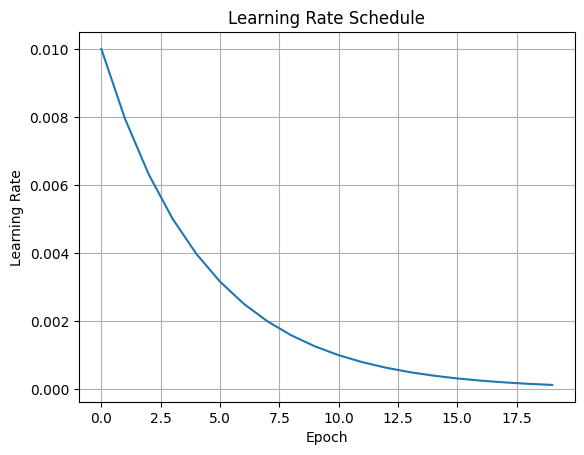

In [ ]:
# 1. Buat model
model = keras.models.Sequential([
    keras.layers.Dense(16, activation='relu', input_shape=(2,)),
    keras.layers.Dense(1, activation='sigmoid')
])

# 2. Compile dengan float learning_rate
optimizer = keras.optimizers.SGD(learning_rate=0.01)
model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])

# 3. Learning rate scheduler callback
def exponential_decay_fn(epoch):
    return 0.01 * 10**(-0.1 * epoch)

lr_scheduler = keras.callbacks.LearningRateScheduler(exponential_decay_fn)

# 4. Fit model
history = model.fit(X_train_scaled, y_train,
                    validation_data=(X_valid_scaled, y_valid),
                    epochs=20,
                    callbacks=[lr_scheduler])

lrs = [exponential_decay_fn(epoch) for epoch in range(20)]
plt.plot(range(20), lrs)
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Learning Rate Schedule")
plt.grid(True)
plt.show()

In [ ]:
def exponential_decay_fn(epoch, lr):
    return lr * 0.1**(1 / 20)

In [ ]:
def piecewise_constant_fn(epoch):
    if epoch < 5:
        return 0.01
    elif epoch < 15:
        return 0.005
    else:
        return 0.001

In [ ]:
lr_scheduler = keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=5)

In [ ]:
s = 20 * len(X_train) // 32 # number of steps in 20 epochs (batch size = 32)
learning_rate = keras.optimizers.schedules.ExponentialDecay(0.01, s, 0.1)
optimizer = keras.optimizers.SGD(learning_rate)

# Avoiding Overfitting Through Regularization

## l1 and l2 Regularization

In [ ]:
layer = keras.layers.Dense(100, activation="elu",
                          kernel_initializer="he_normal",
                          kernel_regularizer=keras.regularizers.l2(0.01))

In [ ]:
from functools import partial

RegularizedDense = partial(keras.layers.Dense,
                            activation="elu",
                            kernel_initializer="he_normal",
                            kernel_regularizer=keras.regularizers.l2(0.01))
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    RegularizedDense(300),
    RegularizedDense(100),
    RegularizedDense(10, activation="softmax",
                      kernel_initializer="glorot_uniform")
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


## Dropout

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.models.Sequential([
    layers.Input(shape=(2,)),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),  # penting untuk MC Dropout
    layers.Dense(1, activation="sigmoid")
])

model.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=0.01),
              metrics=["accuracy"])


## Monte Carlo (MC) Dropout

In [ ]:
y_probas = np.stack([model(X_test_scaled, training=True)
                      for sample in range(100)])
y_proba = y_probas.mean(axis=0)

In [ ]:
np.round(model.predict(X_test_scaled[:1]), 2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


array([[0.61]], dtype=float32)

In [ ]:
np.round(y_probas[:, :1], 2)

array([[[0.6 ]],

       [[0.47]],

       [[0.51]],

       [[0.6 ]],

       [[0.49]],

       [[0.86]],

       [[0.63]],

       [[0.72]],

       [[0.54]],

       [[0.82]],

       [[0.73]],

       [[0.68]],

       [[0.71]],

       [[0.66]],

       [[0.78]],

       [[0.48]],

       [[0.8 ]],

       [[0.57]],

       [[0.52]],

       [[0.32]],

       [[0.77]],

       [[0.44]],

       [[0.57]],

       [[0.76]],

       [[0.69]],

       [[0.6 ]],

       [[0.65]],

       [[0.62]],

       [[0.76]],

       [[0.71]],

       [[0.49]],

       [[0.58]],

       [[0.67]],

       [[0.65]],

       [[0.41]],

       [[0.65]],

       [[0.47]],

       [[0.38]],

       [[0.79]],

       [[0.59]],

       [[0.36]],

       [[0.71]],

       [[0.54]],

       [[0.66]],

       [[0.41]],

       [[0.57]],

       [[0.64]],

       [[0.5 ]],

       [[0.4 ]],

       [[0.55]],

       [[0.76]],

       [[0.71]],

       [[0.68]],

       [[0.67]],

       [[0.86]],

       [[0

In [ ]:
np.round(y_proba[:1], 2)

array([[0.61]], dtype=float32)

In [ ]:
y_std = y_probas.std(axis=0)
np.round(y_std[:1], 2)

array([[0.13]], dtype=float32)

In [ ]:
import numpy as np
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# 1. Generate synthetic 2D classification data
X, y = make_moons(n_samples=1000, noise=0.2, random_state=42)

# 2. Split into train/validation/test sets
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42)

# 3. Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

# 4. Define the model with Dropout for MC Dropout
model = keras.models.Sequential([
    layers.Input(shape=(2,)),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])

model.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.Adam(),
              metrics=["accuracy"])

# 5. Train the model
history = model.fit(X_train_scaled, y_train,
                    epochs=20,
                    validation_data=(X_valid_scaled, y_valid),
                    verbose=1)

# 6. Predict with MC Dropout
y_probas = np.stack([
    model(X_test_scaled, training=True).numpy().flatten()
    for _ in range(100)
])
y_proba = y_probas.mean(axis=0)
y_pred = (y_proba >= 0.5).astype("int32")

# 7. Accuracy
accuracy = np.mean(y_pred == y_test)
print("Accuracy:", accuracy)


Epoch 1/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.5846 - loss: 0.6681 - val_accuracy: 0.5750 - val_loss: 0.6202
Epoch 2/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6260 - loss: 0.6253 - val_accuracy: 0.8000 - val_loss: 0.5621
Epoch 3/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7607 - loss: 0.5468 - val_accuracy: 0.8188 - val_loss: 0.5165
Epoch 4/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.7733 - loss: 0.5336 - val_accuracy: 0.8313 - val_loss: 0.4787
Epoch 5/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7500 - loss: 0.5081 - val_accuracy: 0.8375 - val_loss: 0.4472
Epoch 6/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.7845 - loss: 0.4763 - val_accuracy: 0.8438 - val_loss: 0.4212
Epoch 7/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7935 - loss: 0.4694 - val_accuracy: 0.8500 - val_loss: 0.3991
Epoch 8/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8020 - loss: 0.4538 - val_accuracy: 0.8562 - va

In [ ]:
class MCDropout(keras.layers.Dropout):
    def call(self, inputs):
        return super().call(inputs, training=True)

In [ ]:
Dropout = tf.keras.layers.Dropout
mc_model = tf.keras.Sequential([
    MCDropout(layer.rate) if isinstance(layer, Dropout) else layer
    for layer in model.layers
])
mc_model.set_weights(model.get_weights())

In [ ]:
mc_model.summary()

Model: "sequential_30"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_71 (Dense)                │ (None, 16)             │            48 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mc_dropout (MCDropout)          │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_72 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 65 (260.00 B)

 Trainable params: 65 (260.00 B)

 Non-trainable params: 0 (0.00 B)

## Max-Norm Regularization

In [ ]:
keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal",
                    kernel_constraint=keras.constraints.max_norm(1.))

<Dense name=dense_73, built=False>

In [ ]:
from functools import partial
import tensorflow as tf
from tensorflow import keras

MaxNormDense = partial(keras.layers.Dense,
                       activation="relu", kernel_initializer="he_normal",
                       kernel_constraint=keras.constraints.max_norm(1.))

tf.random.set_seed(42)
model = keras.Sequential([
    keras.Input(shape=(2,)),       # GANTI dari (28, 28) ke (2,)
    MaxNormDense(100),
    MaxNormDense(100),
    keras.layers.Dense(10, activation="softmax")
])
optimizer = keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
              metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))


Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.4389 - loss: 1.6935 - val_accuracy: 0.8687 - val_loss: 0.3512
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8360 - loss: 0.4535 - val_accuracy: 0.8687 - val_loss: 0.3006
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8502 - loss: 0.3764 - val_accuracy: 0.8687 - val_loss: 0.2720
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8485 - loss: 0.3357 - val_accuracy: 0.8750 - val_loss: 0.2633
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8599 - loss: 0.3224 - val_accuracy: 0.8750 - val_loss: 0.2558
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8614 - loss: 0.3132 - val_accuracy: 0.8750 - val_loss: 0.2506
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8608 - loss: 0.3050 - val_accuracy: 0.8813 - val_loss: 0.2463
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8709 - loss: 0.2984 - val_accuracy: 0.8750 - val

# Exercises Solutions

1. Is it OK to initialize all the weights to the same value as long as that value is
selected randomly using He initialization?

>  Tidak boleh. Walaupun nilai acak, jika semua bobot sama, semua neuron akan belajar hal yang sama (symmetry problem), sehingga jaringan tidak akan belajar secara efektif.

2. Is it OK to initialize the bias terms to 0?

> Ya, aman. Bias tidak menyebabkan masalah simetri seperti bobot.

3. Name three advantages of the SELU activation function over ReLU.
* Otomatis melakukan normalisasi (self-normalizing)
* Mengurangi vanishing/exploding gradient
* Tidak mati seperti ReLU (ReLU bisa stuck di 0 selamanya)

4. In which cases would you want to use each of the following activation functions:
SELU, leaky ReLU (and its variants), ReLU, tanh, logistic, and softmax?
* SELU: Untuk deep neural network tanpa batch norm, gunakan dengan LeCun normal init.
* Leaky ReLU: Jika ingin menghindari dead ReLU (neuron yang mati).
* ReLU: Default umum untuk hidden layer. Cepat dan efektif.
* tanh: Gunakan jika output perlu berkisar -1 sampai 1; lebih baik dari sigmoid untuk hidden layer zaman dulu.
* logistic (sigmoid): Untuk output probabilitas biner (0-1).
* softmax: Untuk klasifikasi multi-kelas (output satu kelas aktif dengan probabilitas tertinggi).

5. What may happen if you set the momentum hyperparameter too close to 1 (e.g.,
0.99999) when using an SGD optimizer?> Model bisa “berayun” terlalu jauh (overshoot) dan sulit konvergen, atau malah tidak stabil.

6. Name three ways you can produce a sparse model.
* Gunakan L1 regularization
* Gunakan pruning (hapus bobot kecil setelah training)
* Gunakan dropout atau teknik sparsity-aware training

7. Does dropout slow down training? Does it slow down inference (i.e., making
predictions on new instances)? What about MC Dropout?
* Training: Ya, sedikit lebih lambat (karena unit di-random off).
* Inference: Tidak, dropout tidak aktif saat inferensi standar.
* MC Dropout: Ya, inference jadi lambat karena harus melakukan banyak prediksi (sampling).

8. Practice training a deep neural network on the CIFAR10 image dataset:

a. Build a DNN with 20 hidden layers of 100 neurons each (that’s too many, but
it’s the point of this exercise). Use He initialization and the ELU activation
function.

In [ ]:
import tensorflow as tf
from tensorflow import keras

# Load data
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.cifar10.load_data()
X_train_full = X_train_full.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0
X_train, X_valid = X_train_full[:45000], X_train_full[45000:]
y_train, y_valid = y_train_full[:45000], y_train_full[45000:]

# Flatten images
X_train_flat = X_train.reshape((45000, -1))
X_valid_flat = X_valid.reshape((5000, -1))
X_test_flat = X_test.reshape((10000, -1))

# Model
model = keras.Sequential()
model.add(keras.layers.Input(shape=X_train_flat.shape[1:]))

for _ in range(20):
    model.add(keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"))

model.add(keras.layers.Dense(10, activation="softmax"))

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


b. Using Nadam optimization and early stopping, train the network on the
CIFAR10 dataset. You can load it with keras.datasets.cifar10.load_
data(). The dataset is composed of 60,000 32 × 32–pixel color images (50,000
for training, 10,000 for testing) with 10 classes, so you’ll need a softmax out‐
put layer with 10 neurons. Remember to search for the right learning rate each
time you change the model’s architecture or hyperparameters.

In [98]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.Nadam(),
              metrics=["accuracy"])

early_stop_cb = keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

history = model.fit(X_train_flat, y_train, epochs=50,
                    validation_data=(X_valid_flat, y_valid),
                    callbacks=[early_stop_cb])


Epoch 1/50
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 59s 22ms/step - accuracy: 0.2142 - loss: 2.2349 - val_accuracy: 0.2660 - val_loss: 2.2025
Epoch 2/50
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 27s 19ms/step - accuracy: 0.3285 - loss: 1.8487 - val_accuracy: 0.3318 - val_loss: 1.8923
Epoch 3/50
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 45s 22ms/step - accuracy: 0.3580 - loss: 1.7688 - val_accuracy: 0.3558 - val_loss: 1.8415
Epoch 4/50
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 36s 19ms/step - accuracy: 0.3755 - loss: 1.7263 - val_accuracy: 0.3658 - val_loss: 1.7610
Epoch 5/50
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 21s 15ms/step - accuracy: 0.3920 - loss: 1.6899 - val_accuracy: 0.3610 - val_loss: 1.7978
Epoch 6/50
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 41s 15ms/step - accuracy: 0.3967 - loss: 1.6860 - val_accuracy: 0.3822 - val_loss: 1.7532
Epoch 7/50
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 41s 15ms/step - accuracy: 0.4090 - loss: 1.6460 - val_accuracy: 0.3880 - val_loss: 1.7228
Epoch 8/50
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 40s 14ms/step - accuracy: 0.3621 -

c. Now try adding Batch Normalization and compare the learning curves: Is it
converging faster than before? Does it produce a better model? How does it
affect training speed?

In [99]:
model_bn = keras.Sequential()
model_bn.add(keras.layers.Input(shape=X_train_flat.shape[1:]))

for _ in range(20):
    model_bn.add(keras.layers.Dense(100, kernel_initializer="he_normal"))
    model_bn.add(keras.layers.BatchNormalization())
    model_bn.add(keras.layers.Activation("elu"))

model_bn.add(keras.layers.Dense(10, activation="softmax"))


d. Try replacing Batch Normalization with SELU, and make the necessary adjust‐
ements to ensure the network self-normalizes (i.e., standardize the input fea‐
tures, use LeCun normal initialization, make sure the DNN contains only a
sequence of dense layers, etc.).

In [100]:
scaler = keras.layers.Normalization()
scaler.adapt(X_train_flat)

model_selu = keras.Sequential()
model_selu.add(scaler)

for _ in range(20):
    model_selu.add(keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"))

model_selu.add(keras.layers.Dense(10, activation="softmax"))


e. Try regularizing the model with alpha dropout. Then, without retraining your
model, see if you can achieve better accuracy using MC Dropout.

In [101]:
model_dropout = keras.Sequential()
model_dropout.add(scaler)

for _ in range(20):
    model_dropout.add(keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"))
    model_dropout.add(keras.layers.AlphaDropout(0.1))

model_dropout.add(keras.layers.Dense(10, activation="softmax"))


MC Dropout (inference time):

In [102]:
import numpy as np

# MC Dropout: 100 prediksi, training=True untuk activate dropout
y_probas = np.stack([model_dropout(X_test_flat, training=True) for _ in range(100)])
y_proba = y_probas.mean(axis=0)
y_pred = y_proba.argmax(axis=1)
